In [1]:
%load_ext autoreload
%autoreload 2

# Verbi mallidega mittesobituvate transaktsioonide apriori

**Esimene katsetus**

Voog:
1. paneb patterns tabeli põhjal kokku verbide nimekirja, iga verbi juurde salvestab selle mallide id-d (pat_id)
   * verb on: verb + verb_compound
2. itereerib üle verbide [praeguses versioonis 10 juhuslikku]
   * laeb tabelist verb_matches kõik transaktsioonide id-d, kus verb esines (pat_id järgi)
   * laeb tabelist verb_phrase_matches kõik transaktsioonide id-d, mis sobitusid verbi mallidega
   * leiab verbi transaktsioonide id-d, millele ei sobinud ükski mall
   * analüüsib leitud transaktsioonid apriori algoritmiga (kasutab sqlite ajutise tabeli loomist)
  

In [2]:
#!pip install seaborn sqlalchemy mlxtend tqdm

import sqlite3
import sys
import os
from pathlib import Path
from tqdm import tqdm

from helpers import *
# Get the current working directory and path of the current script
current_directory = os.getcwd()
ROOT = str(Path(current_directory).parent.parent)
sys.path.append(f"{ROOT}/apriori/v33")
from V33Apriori import V33, Transaction, TransactionHead

PATH_TRANSACTIONS_DB = (
    ROOT
    + "/verb_transactions/v33/v33_koondkorpus_sentences_verb_pattern_obl_20241002-130310.db"
)

PATH_PATTERNS_DB = (
    ROOT + "/verb_patterns/v32/vp_data2.db"
)

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

In [3]:

# VERBIDE MALLIDE andmebaas

con = sqlite3.connect(PATH_PATTERNS_DB)
con.row_factory = dict_factory
cur = con.cursor()


In [4]:

# Loeme sisse kõik mallid verbide kaupa
# loeme verbi samaks, kui on sama verb_word+verb_compound 

verbs = cur.execute("""
    SELECT 
        verb_word,
        verb_compound,
        GROUP_CONCAT(pat_id) as pat_ids
    FROM patterns group by verb_word, verb_compound
    ORDER BY verb_word, verb_compound, pat_id
    """
).fetchall()

for v in verbs:
    v['pat_ids'] = v['pat_ids'].split(',')

print(f'Baasis kokku: {len(verbs)} verbi')

Baasis kokku: 1271 verbi


  0%|          | 0/10 [00:00<?, ?it/s]



####################################################


1164 VERB: varjama 


{'pat_id': 2185, 'pattern': 'varjama mille eest', 'verb_word': 'varjama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'gen', 'adp': 'eest', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 5594 transaktsiooni.
5594 !=  5548 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 5548
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
5,0.799027,"[(NSUBJ, nom, , )]",anonüümsus,alpinist,kaubanduskeskus,False,,1
7,0.700433,"[(OBJ, part, , )]",mida,relvi,seda,False,,1
21,0.548125,"[(NSUBJ, nom, , ), (OBJ, part, , )]",fraktsioon mõjujõudu,ma seda,pank luukeresid,False,,2
3,0.310562,"[(AUX, , ei, )]",ei,ei,ei,False,,1
18,0.277938,"[(NSUBJ, nom, , ), (AUX, , ei, )]",ma ei,seadusandjad ei,margit ei,False,,2
1,0.239906,"[(ADVMOD, , , )]",siis,näiliselt,ju,False,,1
13,0.195926,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",see nõnda,arstid seega,laht kunagi,False,,2
14,0.177001,"[(OBJ, part, , ), (ADVMOD, , , )]",sümpaatiat kunagi,soovi samas,seda eriti,False,,2
19,0.169250,"[(OBJ, part, , ), (AUX, , ei, )]",kibestumist ei,pettumust ei,fakti ei,True,(row 28) delta: abs(0.1467 - 0.1693) < 0.03 %:...,2
28,0.146720,"[(NSUBJ, nom, , ), (OBJ, part, , ), (AUX, , ei...",albright rahulolematust ei,nemad tundeid ei,ma väärnähtust ei,False,,3


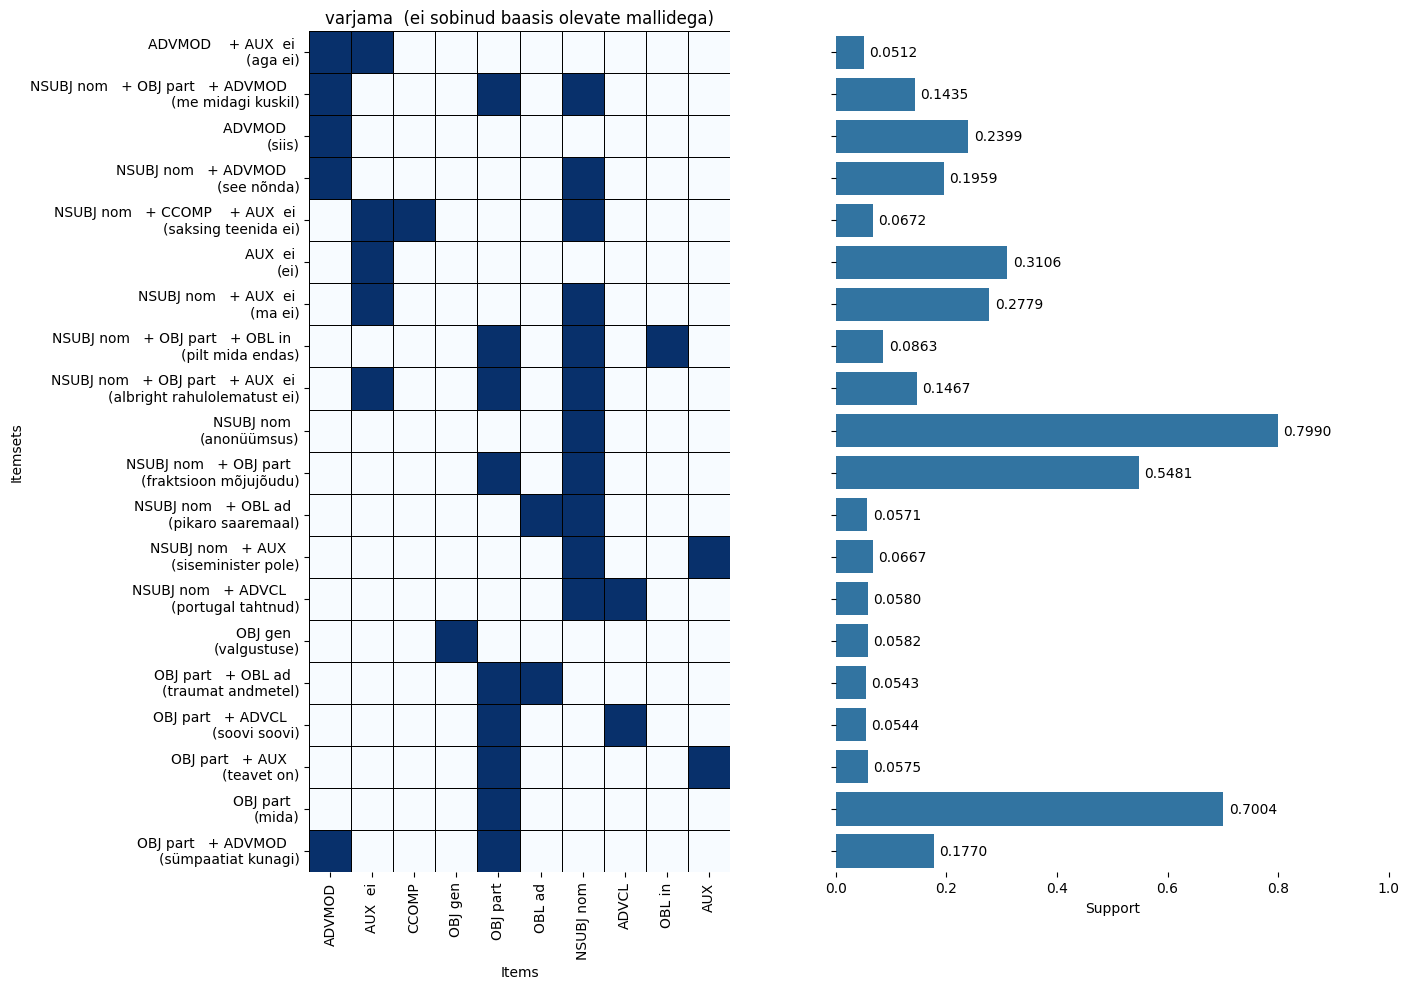

 10%|█         | 1/10 [00:19<02:54, 19.44s/it]



####################################################


895 VERB: sattuma 


{'pat_id': 1651, 'pattern': 'sattuma mida tegema', 'verb_word': 'sattuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': 'tegema'}
{'pat_id': 1652, 'pattern': 'sattuma kuhu', 'verb_word': 'sattuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'all', 'adp': '', 'inf_verb': ''}
{'pat_id': 1653, 'pattern': 'sattuma mille alla', 'verb_word': 'sattuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'gen', 'adp': 'alla', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 31444 transaktsiooni.
31444 !=  31349 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 31349
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
5,0.622476,"[(NSUBJ, nom, , )]",ta,maare,ta,False,,1
1,0.357141,"[(ADVMOD, , , )]",tihti,veel,silmitsi,False,,1
8,0.278733,"[(OBL, adit, , )]",segadusse,segadusse,atmosfääri,False,,1
9,0.257201,"[(OBL, ill, , )]",stuudiosse,avariisse,peredesse,False,,1
15,0.233245,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",ma sinna,president hambusse,me siis,False,,2
20,0.171776,"[(NSUBJ, nom, , ), (OBL, adit, , )]",me teise,esireket hätta,liige nõukokku,False,,2
21,0.154614,"[(NSUBJ, nom, , ), (OBL, ill, , )]",malmö paanikasse,ebatäpsused graafikusse,džiip avariisse,False,,2
7,0.138569,"[(OBL, ad, , )]",kutsel,suvel,otsingutel,False,,1
0,0.125012,"[(ADVCL, , , )]",plahvatas,ületasid,klõpsates,False,,1
19,0.090784,"[(NSUBJ, nom, , ), (OBL, ad, , )]",pulmaplaanid nädalal,kes teel,regina nädalal,False,,2


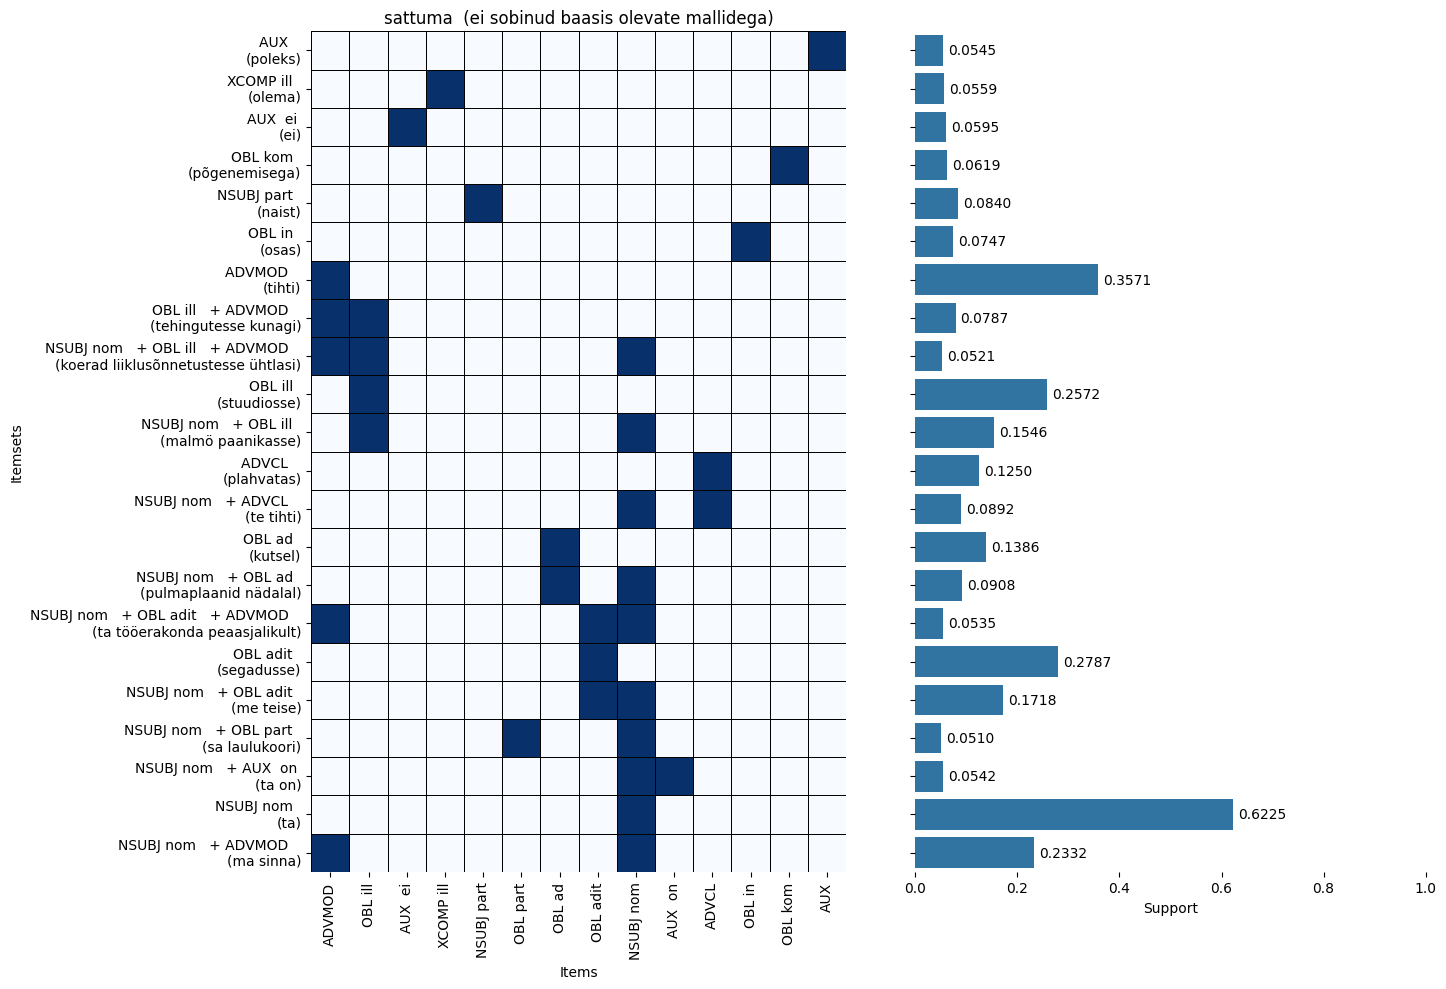

 20%|██        | 2/10 [00:40<02:43, 20.47s/it]



####################################################


785 VERB: praadima 


{'pat_id': 1468, 'pattern': 'praadima mida*', 'verb_word': 'praadima', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 309 transaktsiooni.
309 !=  242 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 242
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
0,0.309917,"[(ADVMOD, , , )]",kunagi,kiiremini,kas,False,,1
3,0.305785,"[(OBJ, nom, , )]",hapukapsad,koogid,peekon,False,,1
1,0.301653,"[(NSUBJ, nom, , )]",kotletid,kotletid,ma,False,,1
5,0.223140,"[(OBL, in, , )]",õlis,rasvas,õlis,False,,1
4,0.177686,"[(OBL, ad, , )]",pannil,pannil,pannil,False,,1
8,0.140496,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",rock seni,inimesed siis,ma ikka,False,,2
7,0.115702,"[(XCOMP, tr, , )]",klaasjaks,pruuniks,kuldkollaseks,False,,1
12,0.082645,"[(OBJ, nom, , ), (OBL, ad, , )]",ülepannikoogid pannil,sibul pannil,leivakäärud pannil,False,,2
6,0.070248,"[(OBL, kom, , )]",võiga,võiga,õliga,False,,1
2,0.066116,"[(OBJ, gen, , )]",kana,ikke,lamba-,False,,1


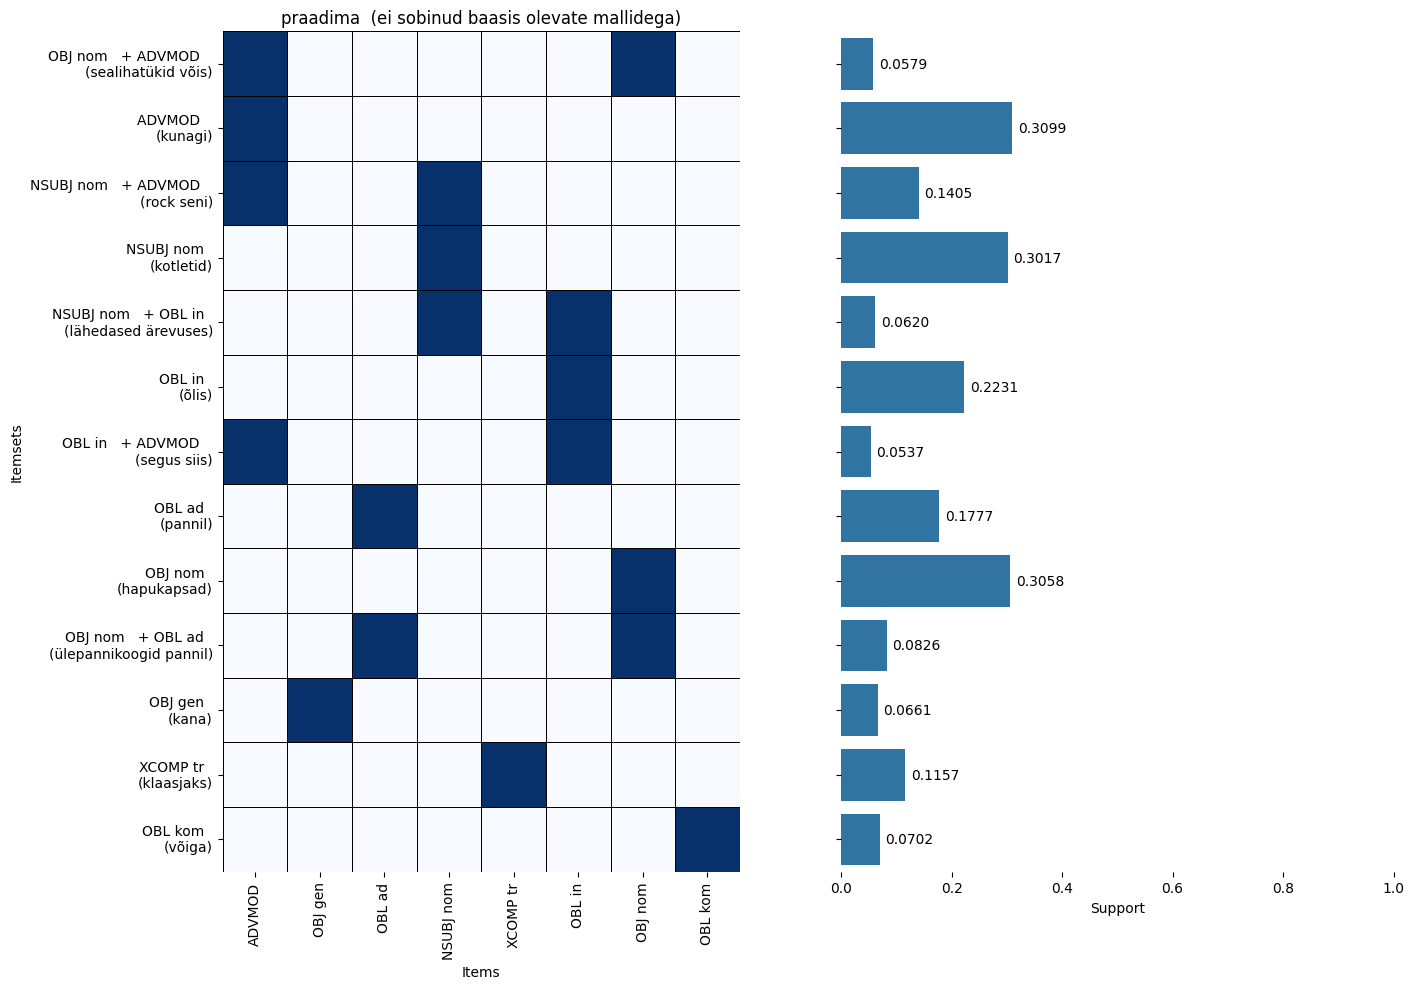

 30%|███       | 3/10 [00:45<01:34, 13.55s/it]



####################################################


502 VERB: kõndima mööda


{'pat_id': 1200, 'pattern': 'mööda kõndima kellest/millest', 'verb_word': 'kõndima', 'verb_compound': 'mööda', 'phrase_nr': 1, 'phrase_case': 'el', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 110 transaktsiooni.
110 !=  102 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 102
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.676471,"[(NSUBJ, nom, , )]",kes,mõnedki,vabariik,False,,1
1,0.450980,"[(ADVMOD, , , )]",siis,enam,lihtsalt,False,,1
7,0.264706,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",kes sealt,kes purjuspäi,poisikene vahel,False,,2
0,0.107843,"[(ADVCL, , , )]",kukkunud,asetades,jõudsin,False,,1
5,0.078431,"[(OBL, in, , )]",kaelas,meeleolus,õhtuhämaruses,False,,1
4,0.068627,"[(OBL, ad, , )]",angelil,pirol,päeval,False,,1
2,0.058824,"[(AUX, , , )]",olin,olin,olla,False,,1
6,0.058824,"[(OBL, part, , )]",vett,tänavat,pikkust,False,,1


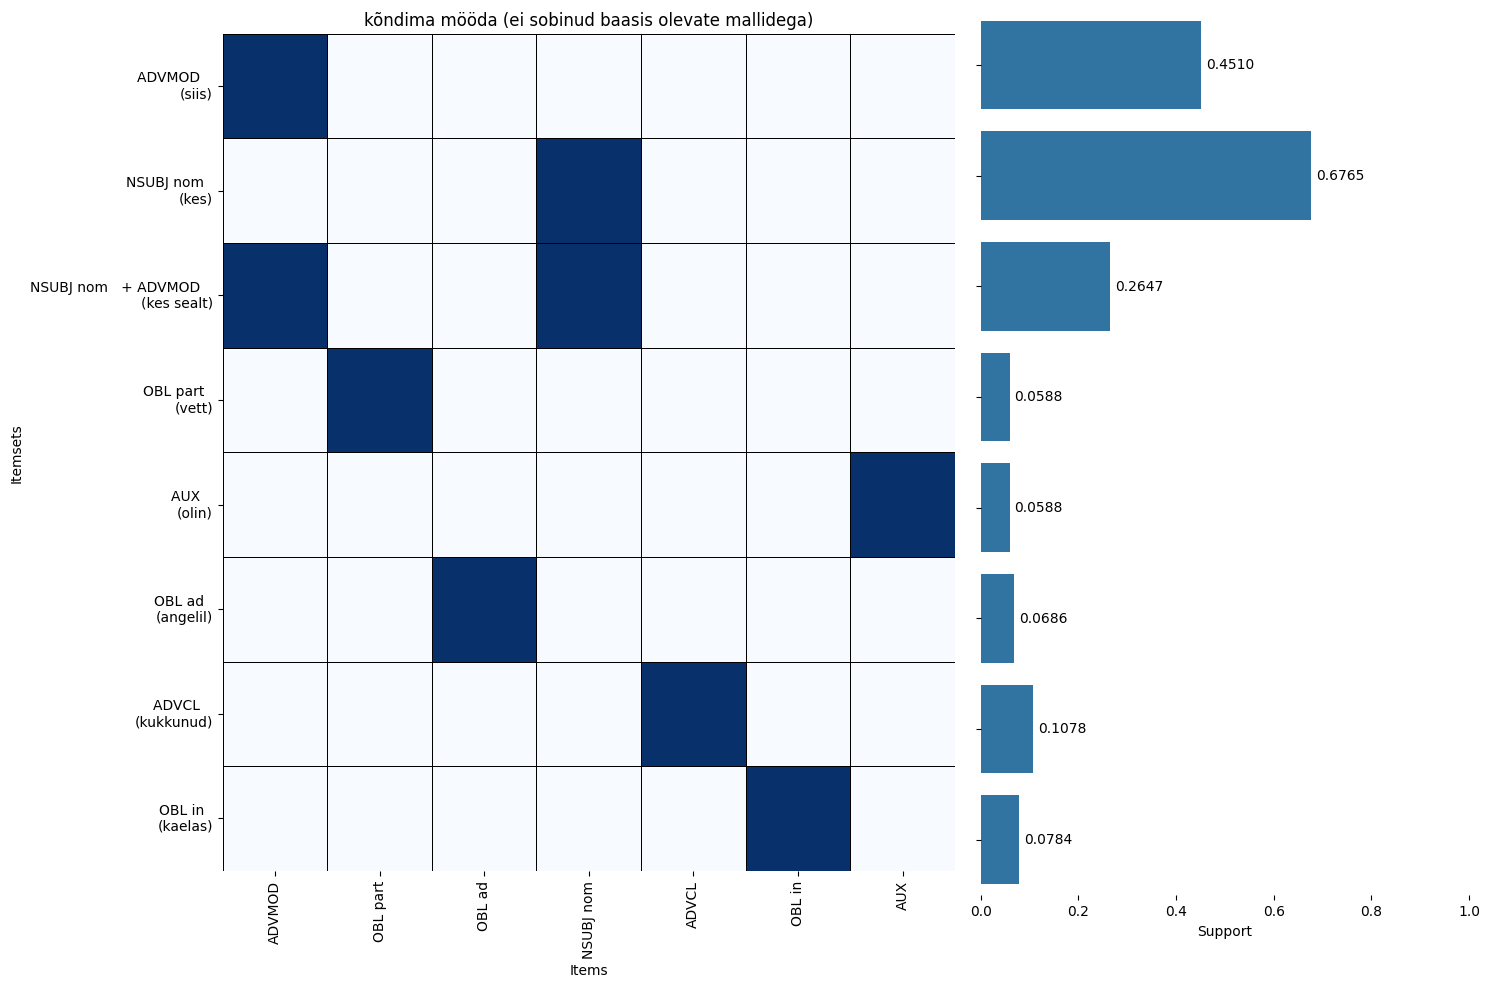

 40%|████      | 4/10 [00:50<01:00, 10.14s/it]



####################################################


226 VERB: istuma 


{'pat_id': 390, 'pattern': 'istuma kuhu', 'verb_word': 'istuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'all', 'adp': '', 'inf_verb': ''}
{'pat_id': 391, 'pattern': 'istuma kus', 'verb_word': 'istuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'ad', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 28798 transaktsiooni.
28798 !=  27782 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 27782
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
2,0.608524,"[(NSUBJ, nom, , )]",kes,deemon,mina,False,,1
4,0.433050,"[(OBL, in, , )]",vangis,vangis,autos,False,,1
1,0.381650,"[(ADVMOD, , , )]",pisut,siin,seal,False,,1
8,0.262184,"[(NSUBJ, nom, , ), (OBL, in, , )]",noormees seljas,ma kohakeses,maria toas,False,,2
6,0.241523,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",sina meelsasti,itaallane taas,pallimängud üldse,False,,2
7,0.136203,"[(OBL, in, , ), (ADVMOD, , , )]",koridoris niisama,lauas kuskil,kodus vist,False,,2
9,0.087611,"[(NSUBJ, nom, , ), (OBL, in, , ), (ADVMOD, , , )]",jokst reas vaikselt,nad alguses alles,taanlane kodus õdusalt,False,,3
5,0.082535,"[(OBL, part, , )]",aega,kuud,kella,False,,1
3,0.075840,"[(OBL, gen, , taga)]",teleri taga,trellide taga,juhi taga,False,,1
0,0.074545,"[(ADVCL, , , )]",kummardudes,saada,istus,False,,1


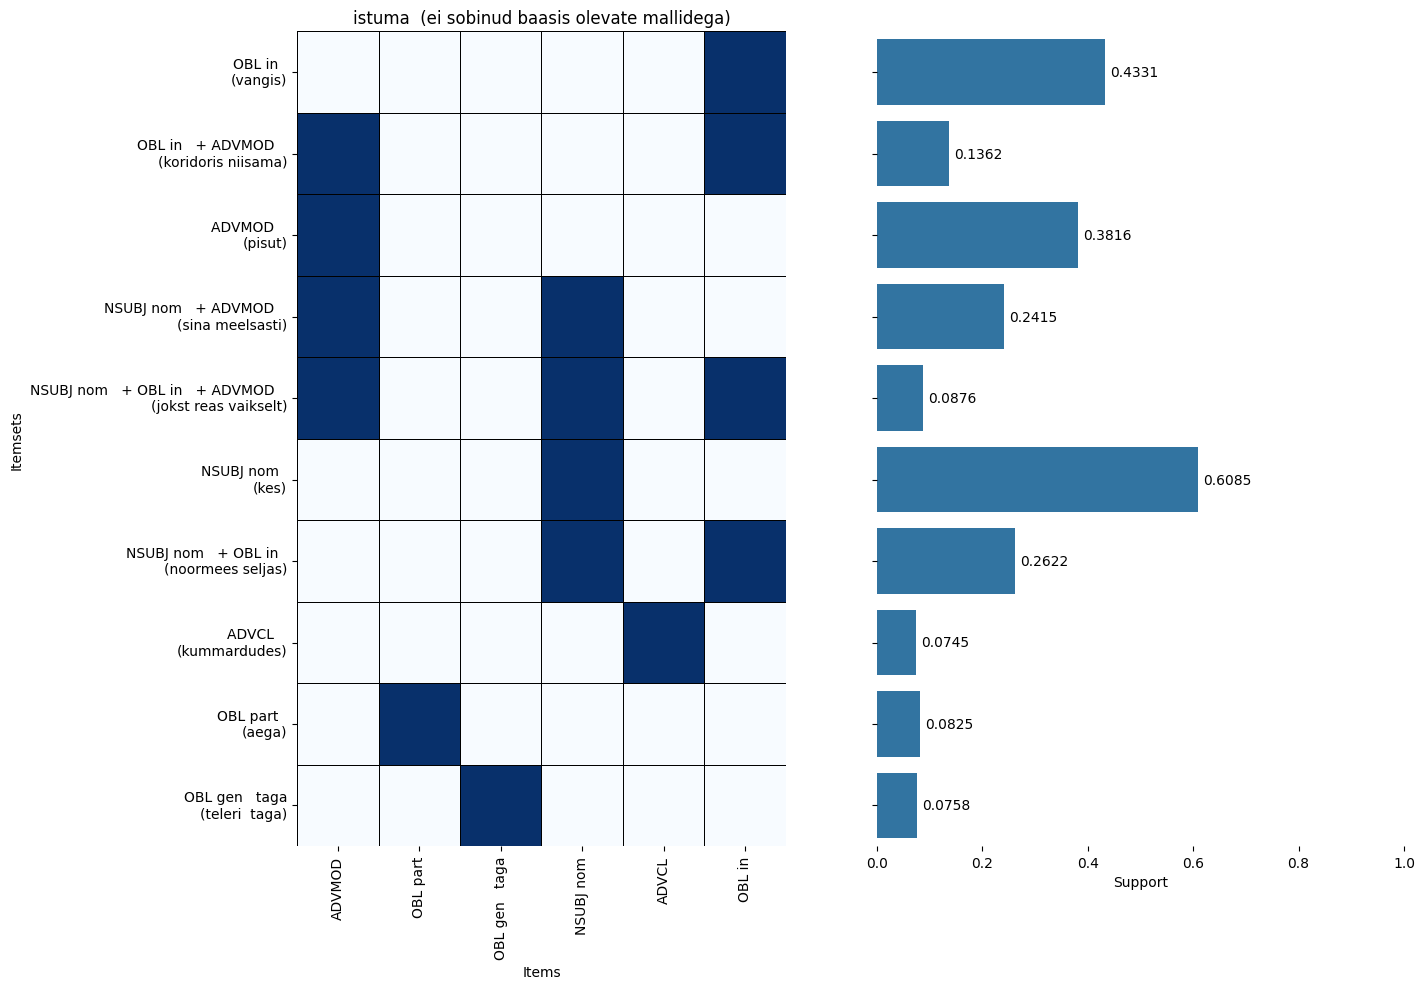

 50%|█████     | 5/10 [01:13<01:13, 14.67s/it]



####################################################


949 VERB: suhtlema 


{'pat_id': 1794, 'pattern': 'suhtlema kellega', 'verb_word': 'suhtlema', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'kom', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 2715 transaktsiooni.
2715 !=  2536 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 2536
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
4,0.629732,"[(NSUBJ, nom, , )]",makušin,jana,nad,False,,1
1,0.615536,"[(ADVMOD, , , )]",samamoodi,vabalt,kas,False,,1
12,0.387224,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",ma tihti,kellassepad palju,kristiina omavahel,False,,2
3,0.154180,"[(AUX, , ei, )]",ei,ei,ei,False,,1
7,0.150237,"[(OBL, in, , )]",riigikeeles,äriasjus,raamatus,False,,1
6,0.132492,"[(OBL, gen, , )]",ajakirjanike,poliitilise,laste,False,,1
16,0.119085,"[(NSUBJ, nom, , ), (AUX, , ei, )]",nad ei,ta ei,ta ei,False,,2
5,0.102129,"[(OBL, ad, , )]",kontsertidel,teemal,haldamisel,False,,1
19,0.099369,"[(NSUBJ, nom, , ), (OBL, in, , )]",silva seltskondades,riigiametnikud võrgus,äritipud ringkonnas,False,,2
11,0.095032,"[(ADVMOD, , , ), (AUX, , ei, )]",viisakalt ei,siis ei,tegelikult ei,True,(row 20) delta: abs(0.0765 - 0.0950) < 0.03 %:...,2


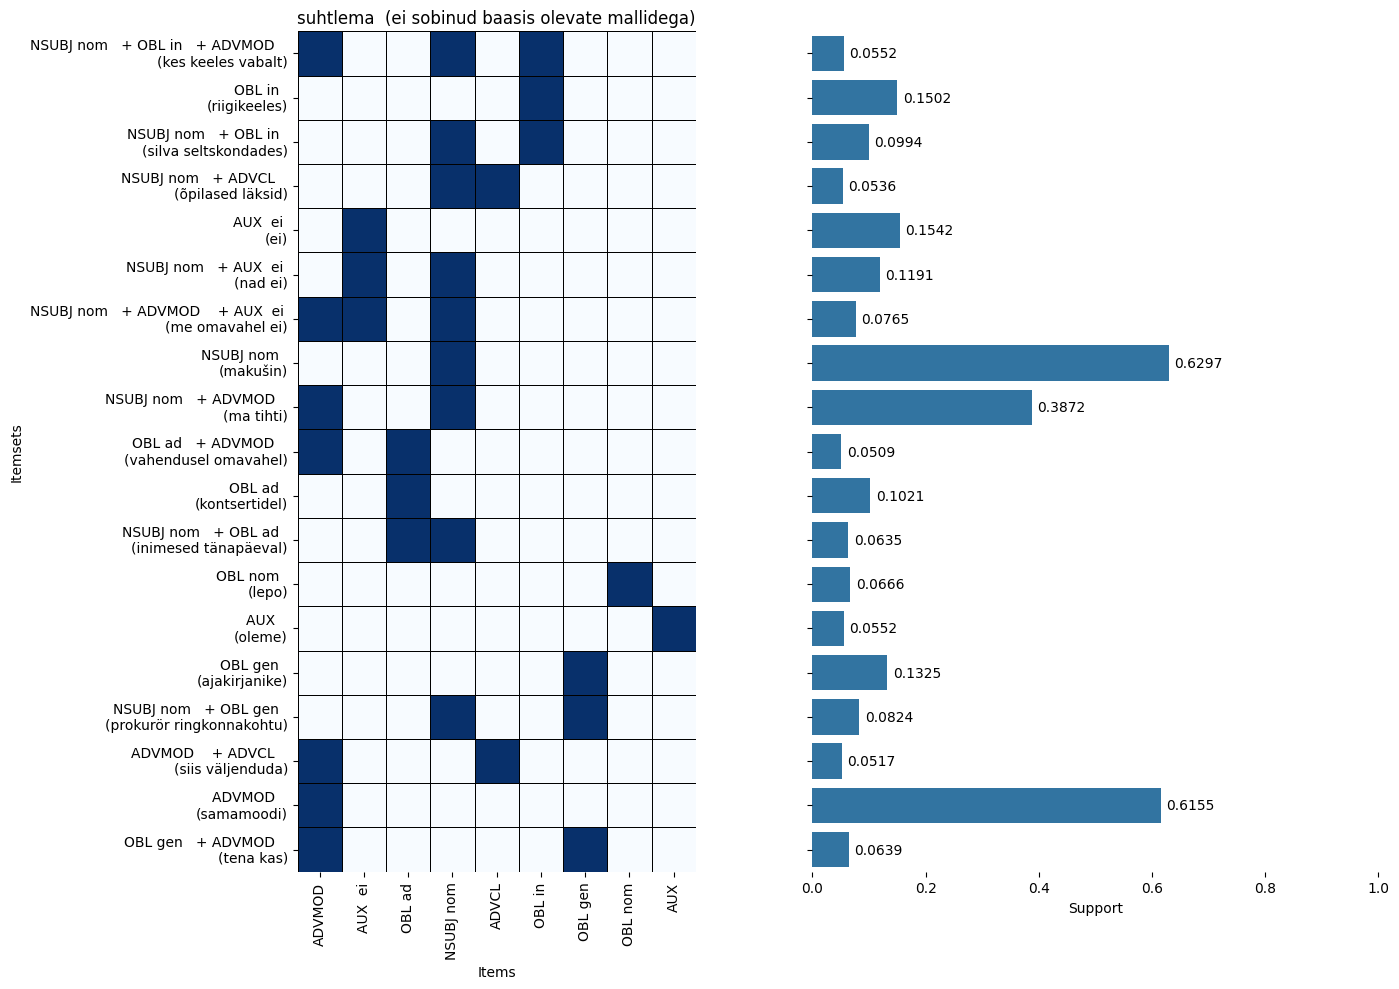

 60%|██████    | 6/10 [01:33<01:05, 16.45s/it]



####################################################


690 VERB: nõustuma 


{'pat_id': 1289, 'pattern': 'nõustuma mida tegema', 'verb_word': 'nõustuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': 'tegema'}
{'pat_id': 1290, 'pattern': 'nõustuma kellega/millega', 'verb_word': 'nõustuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'kom', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 8931 transaktsiooni.
8931 !=  8672 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 8672
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
4,0.788515,"[(NSUBJ, nom, , )]",osalisriik,svetlana,hansen,False,,1
6,0.538976,"[(XCOMP, ill, , )]",finantseerima,osalema,tugevdama,False,,1
15,0.421702,"[(NSUBJ, nom, , ), (XCOMP, ill, , )]",venemaa taastama,olari võtma,iraak desarmeeruma,False,,2
1,0.219903,"[(ADVMOD, , , )]",põhimõtteliselt,põhimõtteliselt,kas,False,,1
9,0.163054,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",nikyas sagedamini,ma täiesti,liit eelkõige,False,,2
2,0.160978,"[(AUX, , ei, )]",ei,ei,ei,True,(row 11) delta: abs(0.1362 - 0.1610) < 0.03 %:...,1
11,0.136185,"[(NSUBJ, nom, , ), (AUX, , ei, )]",ta ei,zelinski ei,naine ei,False,,2
10,0.123270,"[(XCOMP, ill, , ), (ADVMOD, , , )]",tegema aga,hakkama eile,paljastama võibolla,True,(row 17) delta: abs(0.0959 - 0.1233) < 0.03 %:...,2
12,0.112431,"[(XCOMP, ill, , ), (AUX, , ei, )]",minema ei,andma ei,jätkama ei,True,(row 18) delta: abs(0.0957 - 0.1124) < 0.03 %:...,2
0,0.098363,"[(ADVCL, , , )]",puhkab,kuulu,pakuks,True,(row 7) delta: abs(0.0741 - 0.0984) < 0.03 %: ...,1


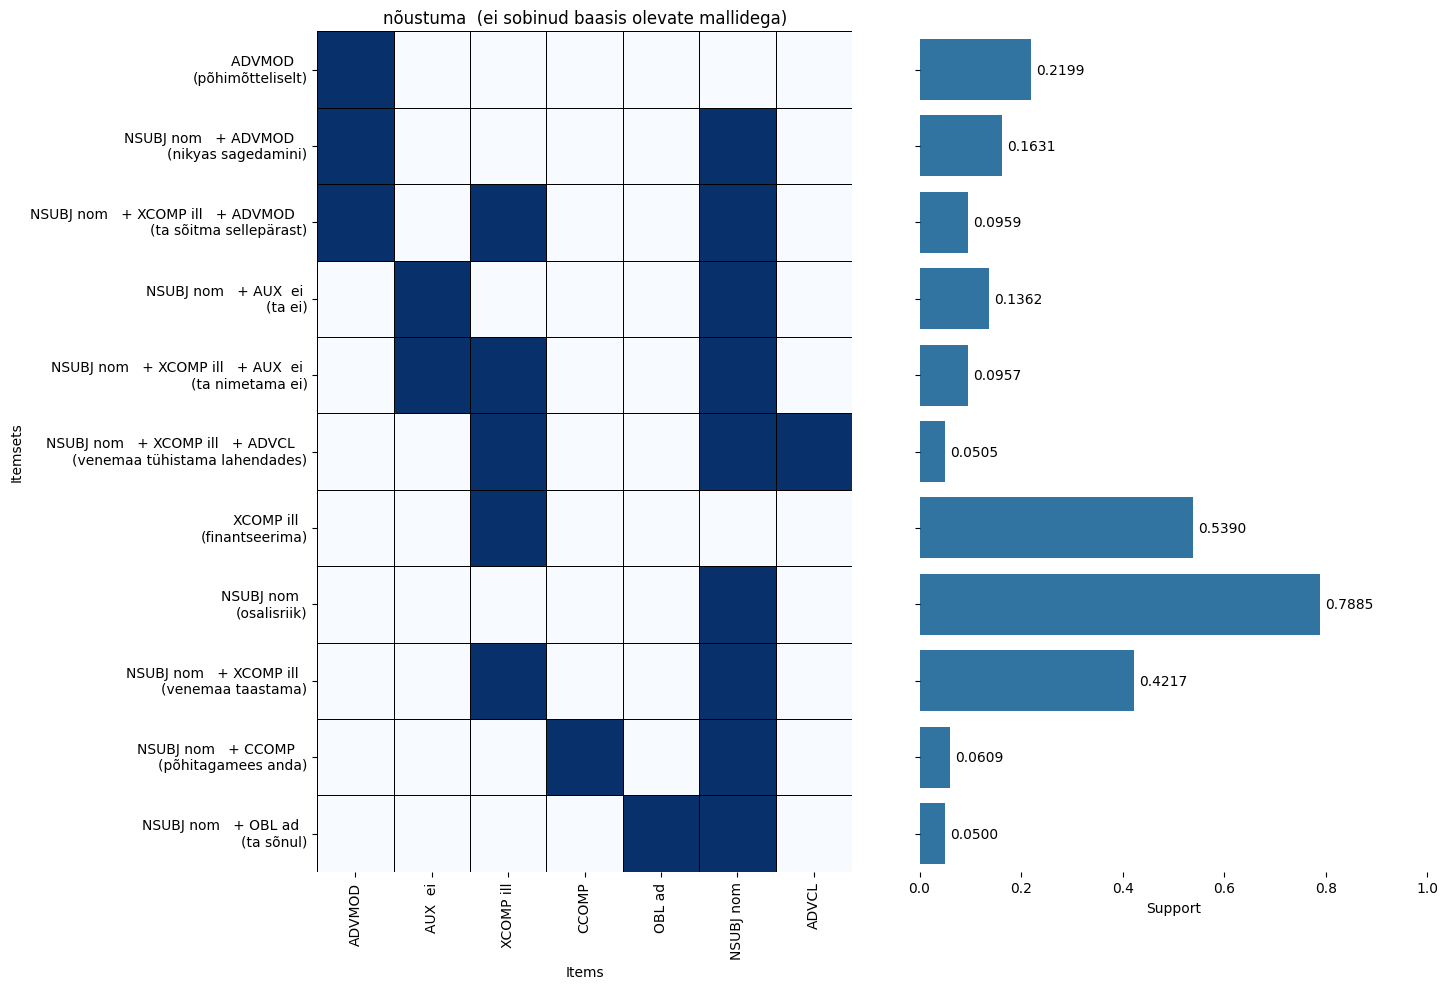

 70%|███████   | 7/10 [01:52<00:51, 17.23s/it]



####################################################


1000 VERB: taltsutama 


{'pat_id': 1901, 'pattern': 'taltsutama keda', 'verb_word': 'taltsutama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 62 transaktsiooni.
62 !=  58 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 58
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.741379,"[(NSUBJ, nom, , )]",sa,latinot,thanatos,False,,1
5,0.431034,"[(OBJ, gen, , )]",käo,talumehe,käo,False,,1
13,0.293103,"[(NSUBJ, nom, , ), (OBJ, gen, , )]",ta mille,mitsubishi käo,pühak looduse,False,,2
6,0.258621,"[(OBJ, nom, , )]",tuulemurrud,juhti,välismüra,False,,1
14,0.206897,"[(NSUBJ, nom, , ), (OBJ, nom, , )]",sillamaa klaverikõla,mis välismüra,mäng latinot,False,,2
1,0.206897,"[(ADVMOD, , , )]",kindlalt,kas,siiski,True,(row 8) delta: abs(0.1897 - 0.2069) < 0.03 %: ...,1
7,0.189655,"[(OBL, in, , )]",läänes,tavakodanikus,milles,False,,1
8,0.189655,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",mis samas,kes kindlalt,ma praegu,False,,2
2,0.155172,"[(AUX, , , )]",ei,ei,ei,True,(row 11) delta: abs(0.1379 - 0.1552) < 0.03 %:...,1
11,0.137931,"[(NSUBJ, nom, , ), (AUX, , , )]",sa oled,rasedus on,rasedus on,False,,2


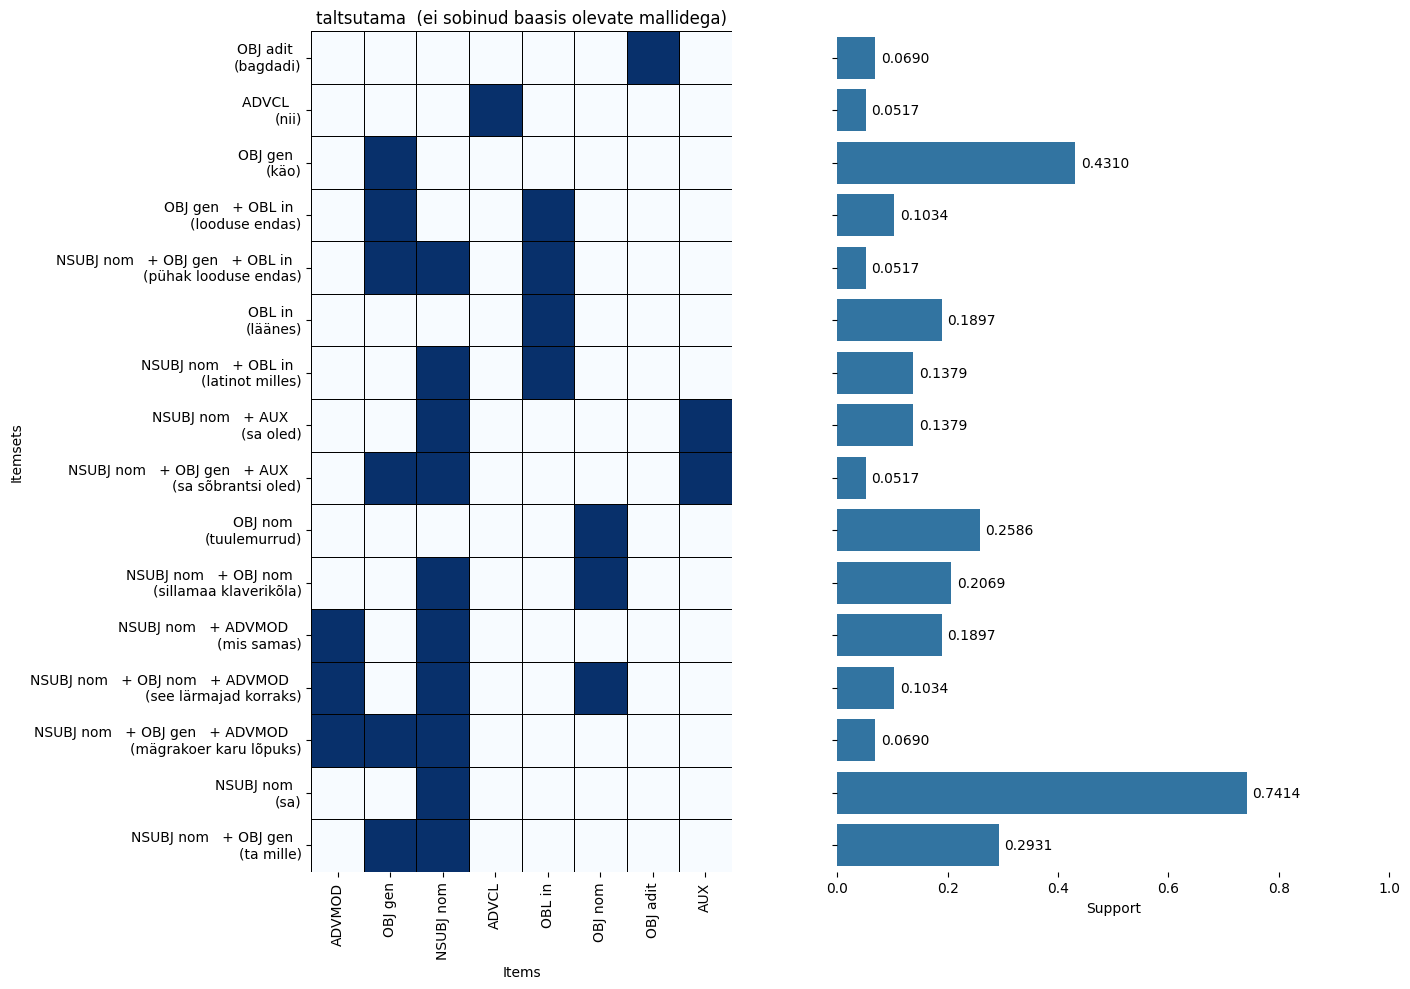

 80%|████████  | 8/10 [01:57<00:26, 13.38s/it]



####################################################


1163 VERB: varastama 


{'pat_id': 2183, 'pattern': 'varastama kust', 'verb_word': 'varastama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'abl', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 4123 transaktsiooni.
4123 !=  3929 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 3929
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.659710,"[(NSUBJ, nom, , )]",filipp,kes,vargad,False,,1
6,0.463986,"[(OBJ, part, , )]",käekotte,vara,kraami,False,,1
15,0.289132,"[(NSUBJ, nom, , ), (OBJ, part, , )]",kes autosid,andrei krooni,keegi kive,False,,2
1,0.240774,"[(ADVMOD, , , )]",seal,sealt,ka,False,,1
8,0.231866,"[(OBL, el, , )]",korteritest,valdusest,poest,False,,1
4,0.222957,"[(OBJ, gen, , )]",muruniiduki,passi,selle,False,,1
17,0.165182,"[(NSUBJ, nom, , ), (OBL, el, , )]",ta kauplustest,sa vasikalaudast,roland kauplustest,False,,2
13,0.149402,"[(NSUBJ, nom, , ), (OBJ, gen, , )]",kes kummipaadi,kes metsa,ämblikud pingviini,False,,2
10,0.148893,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",kindral kas,keegi jälle,ta ka,False,,2
21,0.133876,"[(OBJ, part, , ), (OBL, el, , )]",tööriistu saun-pesumajast,kroonlühtreid kirikust,sularaha sidejaoskonnast,False,,2


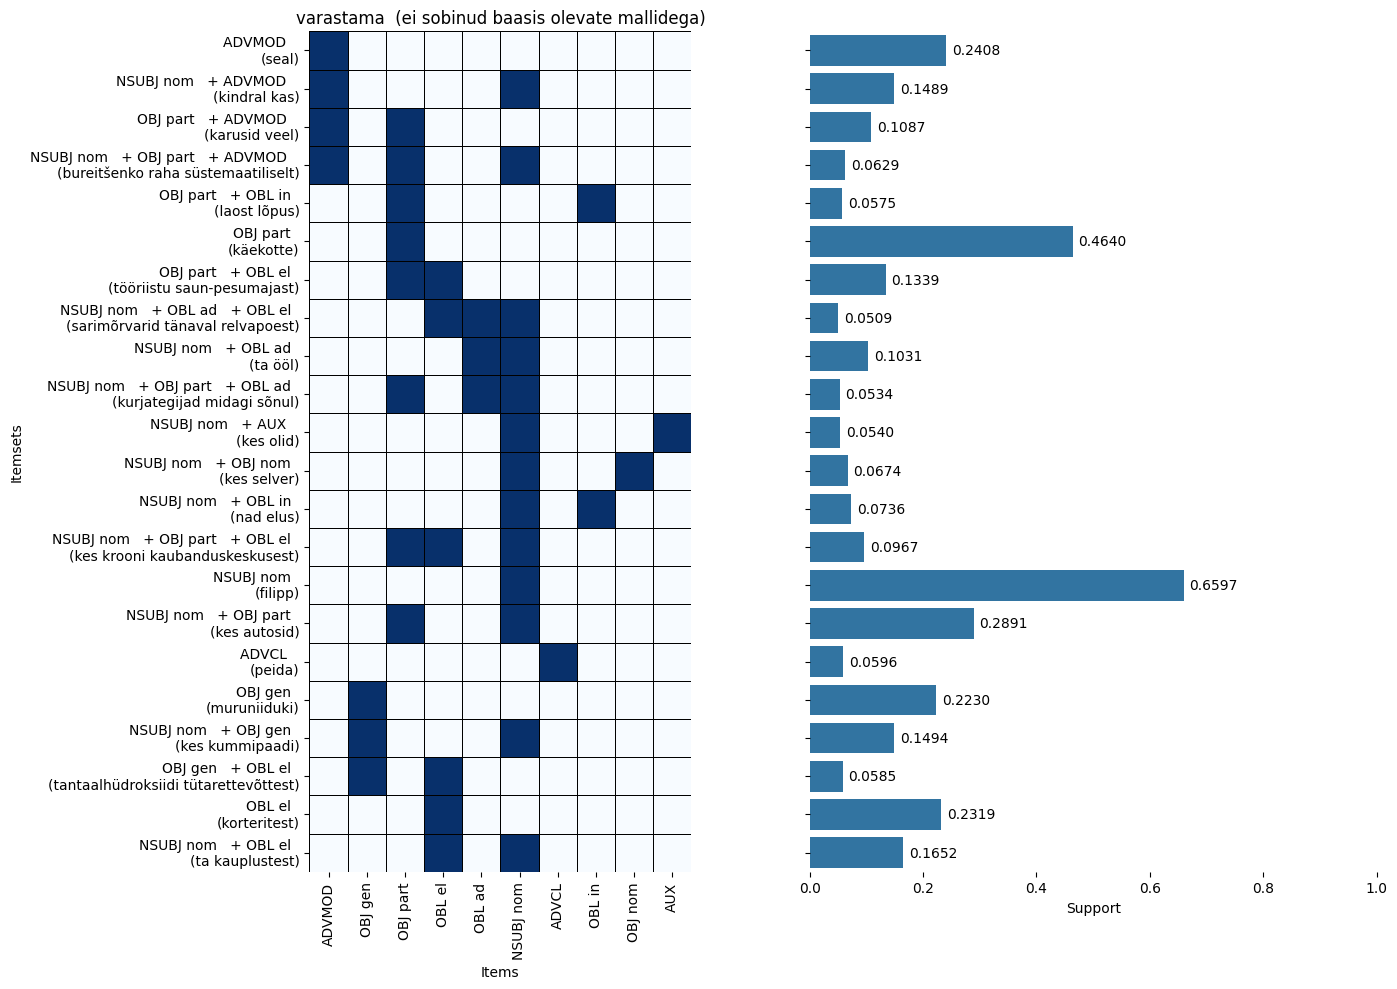

 90%|█████████ | 9/10 [02:15<00:14, 14.89s/it]



####################################################


199 VERB: hüvitama 


{'pat_id': 347, 'pattern': 'hüvitama mida', 'verb_word': 'hüvitama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}
{'pat_id': 348, 'pattern': 'hüvitama millega', 'verb_word': 'hüvitama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'kom', 'adp': '', 'inf_verb': ''}
{'pat_id': 349, 'pattern': 'hüvitama kellele', 'verb_word': 'hüvitama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'all', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 800 transaktsiooni.
800 !=  799 tähendab, et osa transaktsioone on tühjad.


Ridu analüüsimiseks: 799
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.872340,"[(NSUBJ, nom, , )]",isik,mis,vara,False,,1
6,0.332916,"[(OBJ, nom, , )]",investeeringud,kergejõustikuliit,ravikulud,False,,1
17,0.296621,"[(NSUBJ, nom, , ), (OBJ, nom, , )]",linnavalitsus kulutused,haigekassa ravimid,omanik kulutused,False,,2
4,0.227785,"[(OBJ, gen, , )]",viljavarguse,õppelaenu,poole,False,,1
1,0.209011,"[(ADVMOD, , , )]",sisuliselt,siiski,seepärast,True,(row 12) delta: abs(0.1852 - 0.2090) < 0.03 %:...,1
12,0.185232,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",kindlustus väidetavalt,too varem,riik aga,False,,2
15,0.185232,"[(NSUBJ, nom, , ), (OBJ, gen, , )]",haigekassa määra,kindlustus elektrikilbi,linn mummele,False,,2
7,0.125156,"[(OBJ, nom, kahju, )]",kahju,kahju,kahju,True,(row 18) delta: abs(0.1039 - 0.1252) < 0.03 %:...,1
0,0.106383,"[(ADVCL, , , )]",valida,arvestades,jääb,True,(row 11) delta: abs(0.0951 - 0.1064) < 0.03 %:...,1
5,0.105131,"[(OBJ, gen, kahju, )]",kahju,kahju,kahju,True,(row 16) delta: abs(0.0864 - 0.1051) < 0.03 %:...,1


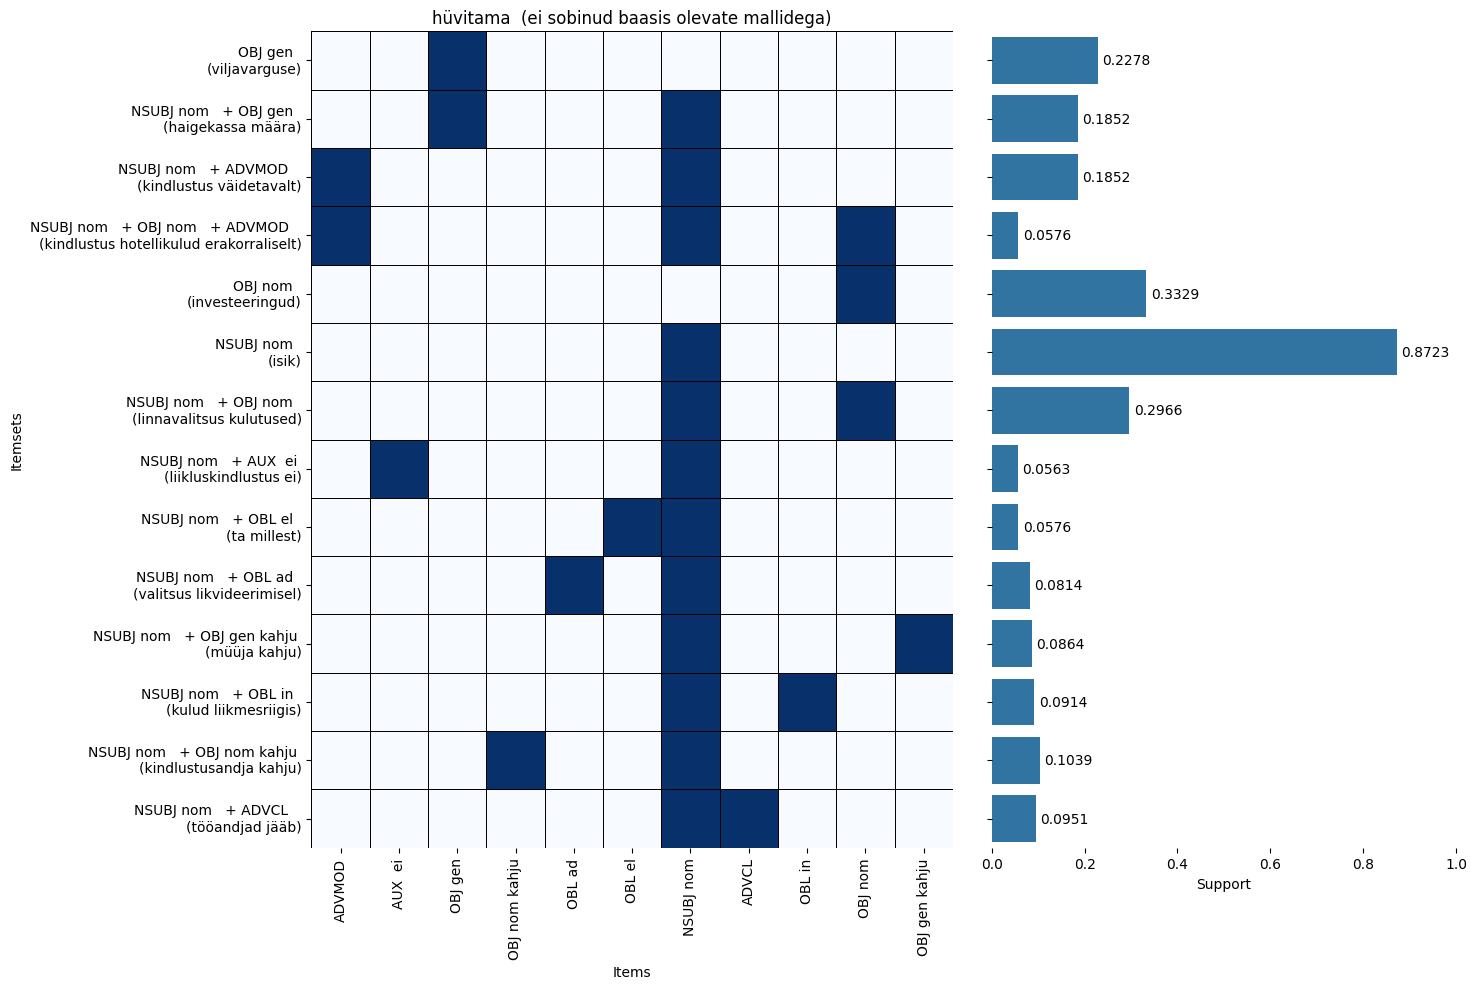

100%|██████████| 10/10 [02:21<00:00, 14.20s/it]

CPU times: user 1min 6s, sys: 21.1 s, total: 1min 27s
Wall time: 2min 21s


In [5]:
%%time
import random
from sqlalchemy import text, select
v33 = V33(
    PATH_TRANSACTIONS_DB,
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )


# 10 juhuslikku
random_i = random.sample(range(0, len(verbs)-1), 10)

# 679 - näima
for i in tqdm(random_i):
#for i in [679]:
    v = verbs[i]
    print()
    print()
    print('####################################################')
    print()
    print()
    print(f"{i} VERB: {v['verb_word']} {v['verb_compound']}")
    print()
    print()
    
    ## leiame iga verbi kohta vajalikud transaktsioonide id-d
    # antud verbi mallidega sobitunud transaktsioonid

    # ilmselt saab seda teha ühe sql päringuga
    verb_all_transactions = cur.execute(
        "SELECT head_id FROM verb_matches where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()


    verb_all_transactions = list(set([vmt['head_id'] for vmt in verb_all_transactions]))

    verb_matched_transactions = cur.execute(
        "SELECT head_id FROM verb_phrase_matches where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()

    verb_matched_transactions = list(set([vmt['head_id'] for vmt in verb_matched_transactions]))
    # transaktsioonid, mis ei sobinud malliga

    unmatched_transactions = [id for id in verb_all_transactions if id not in verb_matched_transactions]
    
    
    patterns = cur.execute(
        "SELECT * FROM patterns where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()
    for p in patterns:
        print(p)

    print()
    if not len(unmatched_transactions):
        print('Ei leitud transaktsioone, mis ei esineks teadaolevates mallides.')
        continue
    print(f'Ei sobinud baasis esinevate mallidega: {len(unmatched_transactions)} transaktsiooni.')
        
    
    transactions = v33.get_transactions_by_head_ids(head_ids=unmatched_transactions)
    
    if len(unmatched_transactions) != len(transactions):
        print(f'{len(unmatched_transactions)} !=  {len(transactions)} tähendab, et osa transaktsioone on tühjad.')
        # print([id for id in unmatched_transactions if id not in transactions])
    
    print()
    print()
    unfiltered = v33.apriori(transactions)
    
    filtered = v33.filter_apriori_results(unfiltered, verbose=True)
    
    
    v33.draw_heatmap(title=f"{v['verb_word']} {v['verb_compound']} (ei sobinud baasis olevate mallidega)", df=filtered)
    
    
    
    

In [6]:
con.close()